## Task 1: Data Pre-processing with Machine Learning

### Task 1.1: Iris Data

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
iris_data = pd.read_csv(r"C:\Users\N.NAGESH\Desktop\CodVeda\Dataset\1) iris.csv")

In [127]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [128]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### There are no null values in the Dataset

#### Let us encode the dependant variable

#### Label Encoding

In [129]:
iris_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [130]:
iris_data['species'] = iris_data['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})


In [131]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [132]:
iris_data['species'].unique()

array([0, 1, 2])

#### One hot Encoding

In [133]:
iris_data = pd.read_csv(r"C:\Users\N.NAGESH\Desktop\CodVeda\Dataset\1) iris.csv")

In [134]:
iris_data = pd.get_dummies(iris_data, columns=['species']) 
iris_data[['species_versicolor', 'species_virginica','species_setosa']] = iris_data[['species_versicolor', 'species_virginica','species_setosa']].astype(int)


In [135]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### Normalizing all the independant variables

#### Min-Max Scaling: Normalizes the value in the range [0,1]

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_data.iloc[:,:-3] = scaler.fit_transform(iris_data.iloc[:,:-3])

In [137]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,0.222222,0.625000,0.067797,0.041667,1,0,0
1,0.166667,0.416667,0.067797,0.041667,1,0,0
2,0.111111,0.500000,0.050847,0.041667,1,0,0
3,0.083333,0.458333,0.084746,0.041667,1,0,0
4,0.194444,0.666667,0.067797,0.041667,1,0,0


#### Standardized Scaling

In [138]:
iris_data = pd.read_csv(r"C:\Users\N.NAGESH\Desktop\CodVeda\Dataset\1) iris.csv")

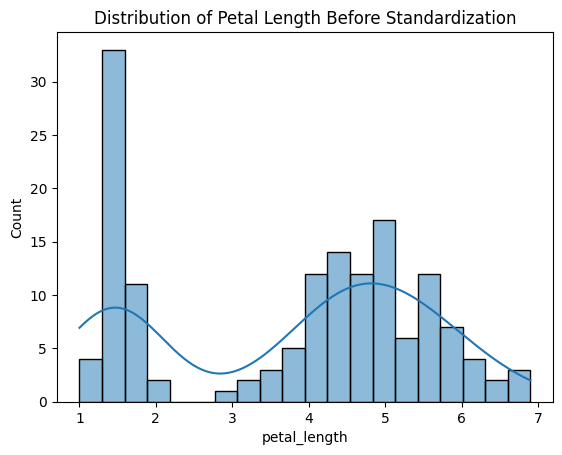

In [139]:
sns.histplot(iris_data['petal_length'], kde=True, bins=20)
plt.title("Distribution of Petal Length Before Standardization")
plt.show()


In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_data.iloc[:, :-1] = scaler.fit_transform(iris_data.iloc[:, :-1])

In [141]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa


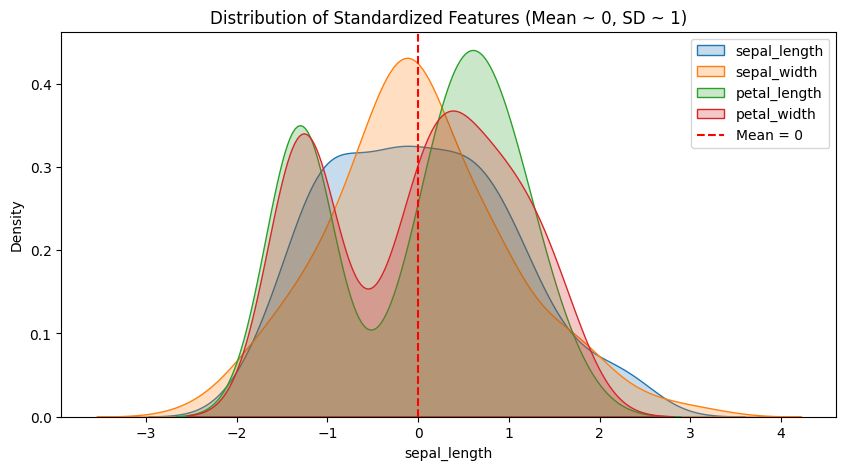

In [142]:
plt.figure(figsize=(10, 5))
for col in iris_data.columns:
    if col == "species":
        continue
    sns.kdeplot(iris_data[col], label=col, fill=True)

plt.axvline(0, color='red', linestyle='dashed', label="Mean = 0")
plt.title("Distribution of Standardized Features (Mean ~ 0, SD ~ 1)")
plt.legend()
plt.show()

### Splitting the Dataset into training and testing with 80:20

In [143]:
from sklearn.model_selection import train_test_split
X = iris_data.drop(columns=['species']) 
y = iris_data['species']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,-1.506521,1.263460,-1.568735,-1.312977
15,-0.173674,3.114684,-1.284407,-1.050031
65,1.038005,0.106445,0.364699,0.264699
11,-1.264185,0.800654,-1.227541,-1.312977
42,-1.748856,0.337848,-1.398138,-1.312977


In [145]:
y_train.head()

22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: species, dtype: object

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
}


In [149]:
classifiers.items()

dict_items([('Naive Bayes', GaussianNB()), ('Logistic Regression', LogisticRegression()), ('K-Nearest Neighbors', KNeighborsClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Support Vector Machine', SVC()), ('Neural Network (MLP)', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000))])

In [150]:
results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")  

Naive Bayes: 1.0000
Logistic Regression: 1.0000
K-Nearest Neighbors: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
Support Vector Machine: 1.0000
Neural Network (MLP): 0.9667
